##### Inspired by this [guide](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)

In [32]:
import tensorflow as tf
(train_data, train_results), (test_data, test_results) = tf.keras.datasets.mnist.load_data()

### Example

Label: 5


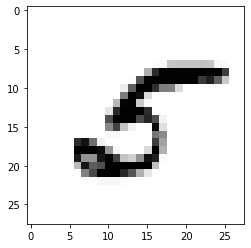

In [33]:
import matplotlib.pyplot as plt
from numpy.random import randint
image_index = randint(0, 60000)
plt.imshow(train_data[image_index], cmap='Greys')
print("Label: " + str(train_results[image_index]))

In [34]:
print("Shape of input: " + str(train_data.shape))

Shape of input: (60000, 28, 28)


In [35]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255
print('train_data shape:', train_data.shape)
print('Number of images in train_data', train_data.shape[0])
print('Number of images in test_data', test_data.shape[0])

train_data shape: (60000, 28, 28, 1)
Number of images in train_data 60000
Number of images in test_data 10000


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


### Training

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_results, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.2042 - accuracy: 0.9399

### Testing

In [38]:
result = model.evaluate(test_data, test_results)
print()
print("Loss: " + str(result[0]) + " | Accuracy: " + str(result[1]))

10000/10000 [==============================] - 2s 199us/step

### Prediction

4


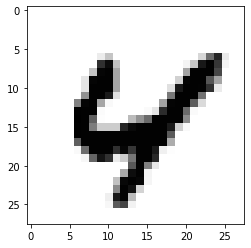

In [39]:
image_index = randint(0, 10000)
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_data[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [41]:
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
